## Note this implementation is faulty and requires more attention

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
class SVMNonLinear():
    def __init__(self, max_iter = 1000, kernel = "linear", r = 2, gamma = 0.1, epsilon= 0.0001, random_state=1, C = 1):
        self.kernels = {
            "linear" : self.kernel_linear,
            "polynomial": self.kernel_poly,
            "rbf": self.kernel_rbf
        }
        self.C =  C
        self.kernel = self.kernels[kernel]
        self.gamma = gamma
        self.r = r
        self.random_state  = random_state
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.w_ = None
        self.b_ = None
        self.rgen_ = np.random.RandomState(self.random_state)
    def kernel_linear(self, x1, x2):
        return np.dot(x1,x2.T)
    def kernel_poly(self, x1, x2):
        return self.kernel_linear(x1,x2)**self.r
    def kernel_rbf(self, x1, x2):
        return np.exp(-np.linalg.norm(x1-x2)**2/(self.gamma)**2)
    def random_int(self, a, b, z):
        """
        returns random integer between a and b excluding z

        """
        r = list(range(a,z)) + list(range(z+1, b))
        return np.random.choice(r)
    
    def get_range(self, C, alpha_j, alpha_i, y_j, y_i):
        """
        KKT Box Condition
        """
        if y_j!=y_i:
            return max(0, alpha_j-alpha_i), min(C, C-alpha_i + alpha_j)
        else:
            return max(0, alpha_j+alpha_i), min(C, alpha_i+alpha_j)
    
    def fit(self, X,y):
        self.w_ = self.rgen_.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0.0
        alpha = np.zeros((X.shape[0]))
        for epoch in range(self.max_iter):
            alpha_prev = np.copy(alpha)
            for j in range(0, len(alpha)):
                i = self.random_int(0, len(alpha)-1, j)
                
                ## get the second derivate to see if we have minimazation possible
                kij = self.kernel(X[i], X[i]) + self.kernel(X[j], X[j]) - 2* self.kernel(X[i], X[j])
                
                if kij<=0:
                    continue
                alpha_i, alpha_j = alpha[i], alpha[j]

                L, H = self.get_range(self.C, alpha_j, alpha_i,y[j], y[i])
                
                E_i = np.sign(np.dot(X[i], self.w_) + self.b_) - y[i]
                E_j = np.sign(np.dot(X[j], self.w_) + self.b_) - y[j]

                alpha[j] = alpha_i + float(y[j]*(E_i-E_j))/kij

                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_i + y[i]*y[j]*(alpha_i - alpha[j])

            diff = np.linalg.norm(alpha-alpha_prev)
            if diff<self.epsilon:
                break
        
        self.w_ = np.dot(X.T, np.multiply(alpha, y ))
        self.b_ = np.mean(y- np.dot(X,self.w_))

        idx = np.where(alpha>0)[0]
        return X[idx]
    
    def predict(self, X):
        return np.sign(np.dot(X,self.w_) + self.b_)
    
    def get_accuracy(self, X, y):
        correct = self.predict(X) == y
        return 100*sum(correct)/len(y)
    

In [114]:
from sklearn.datasets import make_circles
X, y = make_circles(random_state=42, factor=0.5)
X.shape
y.shape
indices_of_ones = [index for index, value in enumerate(y) if value == 1]
y = 2*y-1

In [115]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

In [116]:
svm  = SVMNonLinear(kernel="polynomial")
svm.fit(X,y)

array([[-2.67913397e-01, -4.22163963e-01],
       [ 1.87381315e-01, -9.82287251e-01],
       [-4.04508497e-01, -2.93892626e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [-6.37423990e-01,  7.70513243e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [-4.84291581e-01,  1.24344944e-01],
       [-5.35826795e-01, -8.44327926e-01],
       [ 1.54508497e-01, -4.75528258e-01],
       [-7.28968627e-01, -6.84547106e-01],
       [ 4.04508497e-01,  2.93892626e-01],
       [ 3.13952598e-02, -4.99013364e-01],
       [ 5.35826795e-01, -8.44327926e-01],
       [-3.64484314e-01,  3.42273553e-01],
       [ 3.09016994e-01, -9.51056516e-01],
       [ 4.38153340e-01, -2.40876837e-01],
       [-4.64888243e-01,  1.84062276e-01],
       [-1.54508497e-01, -4.75528258e-01],
       [-9.29776486e-01, -3.68124553e-01],
       [-2.12889646e-01,  4.52413526e-01],
       [-1.54508497e-01,  4.75528258e-01],
       [-4.25779292e-01,  9.04827052e-01],
       [-4.

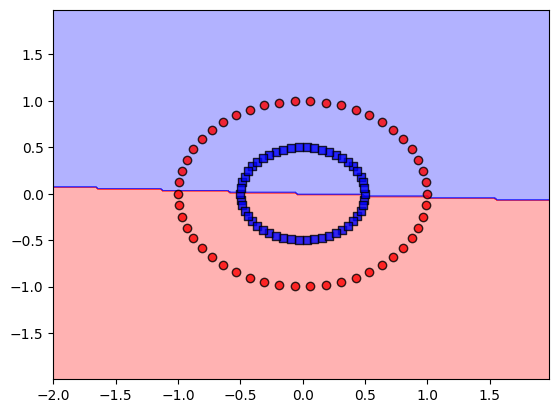

In [117]:
plot_decision_regions(X,y, classifier=svm)

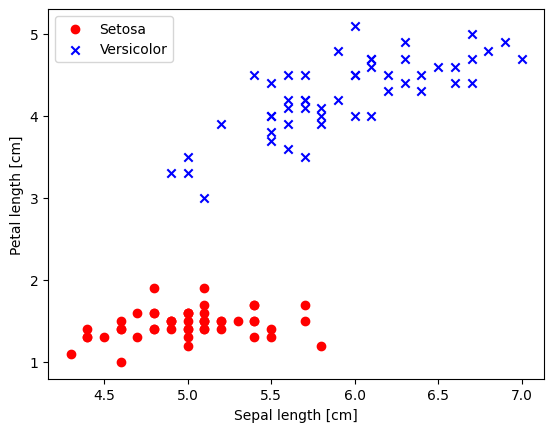

In [118]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
# extract only the setosa and versicolor  //the first 50 are setosa and next fifty are versiColor
y  = df.iloc[0:100, 4].values
y = np.where(y=="Iris-setosa", -1, 1)
X = df.iloc[0:100, [0,2]].values

#plot them
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:,1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


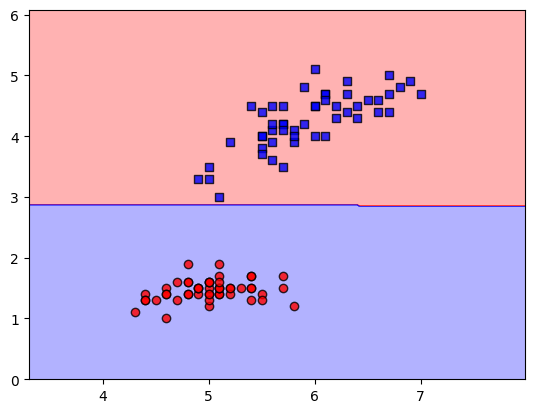

In [121]:
lg = SVMNonLinear(max_iter=1000, C = 0.0001)
lg.fit(X,y)
plot_decision_regions(X, y, classifier=lg)

In [122]:
lg.get_accuracy(X,y)

0.0